# [API from FMP github](https://github.com/antoinevulcain/Financial-Modeling-Prep-API)

In [1]:
from urllib.request import urlopen
import json
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 999,'display.max_columns', 999,'display.width', 999)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ticker = 'AAPL'
key = urlopen('https://financialmodelingprep.com/api/v3/company-key-metrics/'+ ticker +'?period=quarter')
inc = urlopen('https://financialmodelingprep.com/api/v3/financials/income-statement/'+ ticker +'?period=quarter')
bs = urlopen('https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/'+ ticker +'?period=quarter')
cfs = urlopen('https://financialmodelingprep.com/api/v3/financials/cash-flow-statement/'+ ticker +'?period=quarter')
gro = urlopen('https://financialmodelingprep.com/api/v3/financial-statement-growth/'+ticker+'?period=quarter')
pri = urlopen('https://financialmodelingprep.com/api/v3/historical-price-full/'+ticker+'?serietype=line')

def key_ratio(data):
    return json.loads(data.read().decode("utf-8"))

dic = key_ratio(key) 
df_key = pd.DataFrame(dic['metrics'], index= range(len(dic['metrics'])))[::-1]
dic = key_ratio(inc) 
df_inc = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(bs) 
df_bs = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(cfs) 
df_cfs = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(gro) 
df_gro = pd.DataFrame(dic['growth'], index= range(len(dic['growth'])))[::-1]
dic = key_ratio(pri) 
df_pri = pd.DataFrame(dic['historical'], index= range(len(dic['historical'])))

one = pd.merge( df_key, df_inc, on ='date')
two = pd.merge( df_bs, df_cfs, on ='date')
four = pd.merge( one, two, on ='date')
df = pd.merge( four, df_gro, on= 'date').tail(13) # 五張表總匯、只取13季
df.set_index('date',inplace=True)
print('原欄數',df.shape) # 141欄ratio

# 轉出後再讀入
df.to_csv('example.csv')
df = pd.read_csv('example.csv',index_col='date')
df.sort_values(by = df.index[-1], ascending= False, axis= 1, inplace=True)
df

原欄數 (13, 141)


,Enterprise Value,Market Cap,Total assets,Total liabilities,Total non-current assets,Investments,Total non-current liabilities,Total current assets,Total debt,Long-term investments,Total current liabilities,Cash and short-term investments,Long-term debt,Total shareholders equity,Net Debt,Revenue,Short-term investments,Working Capital,Other comprehensive income,Cash and cash equivalents,Average Payables,Cost of Revenue,"Property, Plant & Equipment Net",Retained earnings (deficit),Payables,Gross Profit,Average Receivables,Receivables,EBITDA,Operating Cash Flow,Earnings before Tax,Operating Income,EBIT,Free Cash Flow,Net Income,Net Income Com,Consolidated Income,Short-term debt,Operating Expenses,Investing Cash flow,Deferred revenue,SG&A Expense,R&D Expenses,Weighted Average Shs Out (Dil),Weighted Average Shs Out,Average Inventory,Inventories,Depreciation & Amortization,Income Tax Expense,Capital Expenditure,Stock-based compensation,Net cash flow / Change in cash,Interest Expense,EV to Free cash flow,PE ratio,PFCF ratio,EV to Operating cash flow,POCF ratio,Enterprise Value over EBITDA,Tangible Book Value per Share,Graham Number,Capex to Revenue,Interest Debt per Share,EV to Sales,Price to Sales Ratio,Shareholders Equity per Share,Book Value per Share,Interest Coverage,PB ratio,PTB ratio,Revenue per Share,Cash per Share,Capex to Operating Cash Flow,Net Debt to EBITDA,Debt to Equity,Operating Cash Flow per Share,Free Cash Flow per Share,EPS,EPS Diluted,Net Income per Share,Capex to Depreciation,Current ratio,Income Quality,Dividend per Share,Debt to Assets,Capex per Share,Gross Margin,Payout Ratio,EBITDA Margin,Earnings Before Tax Margin,EBIT Margin,Free Cash Flow margin,Net Profit Margin,Profit Margin,SG&A to Revenue,R&D to Revenue,Stock-based compensation to Revenue,R&D Expense Growth,Free Cash Flow Yield,Earnings Yield,Dividend Yield,Tax assets,Goodwill and Intangible Assets,Net Cash/Marketcap,Intangibles to Total Assets,Other Assets,Other Liabilities,Book Value per Share Growth,Net Income - Non-Controlling int,Net Income - Discontinued ops,Preferred Dividends,Deposit Liabilities,Tax Liabilities,Effect of forex changes on cash,Weighted Average Shares Diluted Growth,Weighted Average Shares Growth,Debt Growth,Dividends per Share Growth,SG&A Expenses Growth,Asset Growth,Inventory Growth,Receivables growth,Gross Profit Growth,Revenue Growth,EPS Diluted Growth,EPS Growth,Net Income Growth,EBIT Growth,Operating Income Growth,Operating Cash Flow growth,Free Cash Flow growth,Graham Net-Net,Acquisitions and disposals,Dividend payments,Issuance (repayment) of debt,Investment purchases and sales,Issuance (buybacks) of shares,Financing Cash Flow,Net Current Asset Value,Tangible Asset Value,Invested Capital
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-01,8.447101e+11,7.713371e+11,3.345320e+11,2.004500e+11,2.325420e+11,2.416840e+11,1.271080e+11,1.019900e+11,8.853000e+10,1.897400e+11,7.334200e+10,6.710100e+10,8.453100e+10,1.340820e+11,7.337300e+10,5.289600e+10,5.194400e+10,2.864800e+10,28373185000,1.515700e+10,3.684200e+10,3.230500e+10,2.716300e+10,1.009250e+11,2.857300e+10,2.059100e+10,1.627450e+10,1.157900e+10,1.642900e+10,1.252300e+10,1.468400e+10,1.409700e+10,1.409700e+10,9.508000e+09,1.102900e+10,1.102900e+10,1.102900e+10,3.999000e+09,6.494000e+09,-1.420200e+10,7.682000e+09,3.718000e+09,2.776000e+09,5.294841e+09,5.262226e+09,3.503500e+09,2.910000e+09,2.332000e+09,3.655000e+09,3.015000e+09,1.217000e+09,-1.214000e+09,5.300000e+08,88.842037,69.937174,81.125062,67.452694,61.593635,51.415794,62.034964,34.663712,17.544279,16.924397,15.969262,14.582144,25.480092,25.480092,26.598113,5.752727,5.752727,10.052020,2.880340,4.153566,4.466066,1.494981,2.379791,1.806840,2.12,2.10,2.095881,0.773466,1.390608,1.135461,0.567345,0.599195,0.572951,0.389273,0.272373,0.310591,0.277601,0.266504,0.180505,0.208503,0.208503,0.070289,0.070289,0.023007,-0.0330

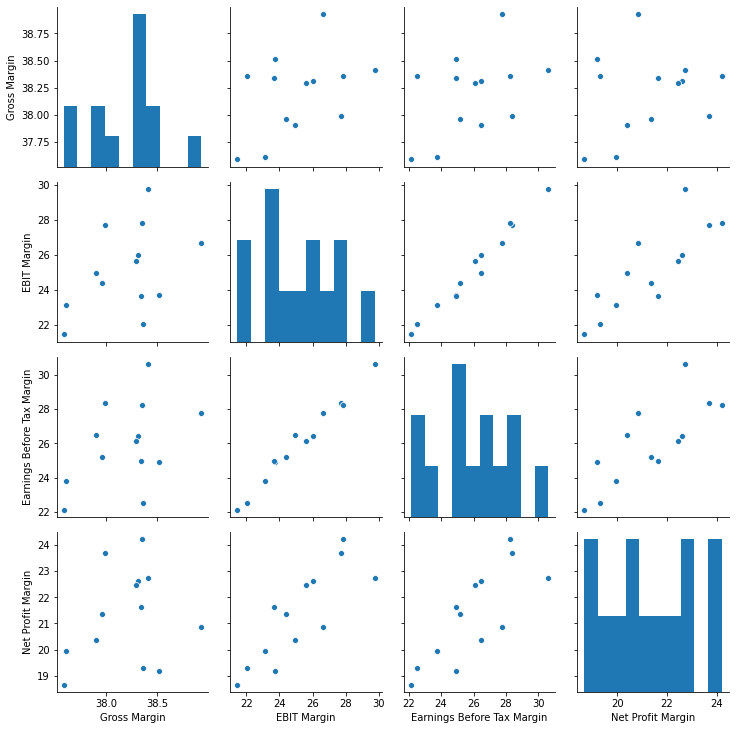

In [3]:
import plotly
import cufflinks
cufflinks.go_offline()
plotly.io.renderers.default = 'colab'
margin_chart = df[['Gross Margin','EBIT Margin', 'Earnings Before Tax Margin', 'Net Profit Margin']]*100

# 觀察利潤率的分佈是否skew異常
sns.pairplot(margin_chart)
margin_chart.iplot()

In [4]:
growth_chart = df[['Revenue Growth', 'Gross Profit Growth', 'R&D Expense Growth', 'Operating Income Growth', 'EBIT Growth', 'EPS Growth', 'Net Income Growth', 'Debt Growth']]
growth_chart['price'] = 0.
df_pri = df_pri.set_index('date') # set_index只能執行一次，若要多次運算此cell就要註解掉這行
for i in range(len(df)):
    growth_chart['price'][i] = df_pri.loc[:growth_chart.index[i]][-1:].values[0][0]

# 股價在右邊y軸，與成長率係數們做比較
growth_chart[:-1].iplot(secondary_y= ['price'], width = 2)